In [47]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

In [48]:
# Load data
debug_dir = "/home/maggie/research/robosuite/debug"
xyz = np.load(f"{debug_dir}/xyz.npy")
rgb = np.load(f"{debug_dir}/rgb.npy")
depth = np.load(f"{debug_dir}/depth.npy")
rgb_image = np.load(f"{debug_dir}/rgb_image.npy")
inputs = np.load(f"{debug_dir}/inputs.npy")
points = np.load(f"{debug_dir}/points.npy")

print(f"XYZ shape: {xyz.shape}")
print(f"RGB shape: {rgb.shape}")
print(f"Depth shape: {depth.shape}")
print(f"RGB image shape: {rgb_image.shape}")
print(f"Inputs shape: {inputs.shape}")
print(f"Points shape: {points.shape}")

XYZ shape: (215466, 3)
RGB shape: (215466, 3)
Depth shape: (512, 512, 1)
RGB image shape: (512, 512, 3)
Inputs shape: (16384, 6)
Points shape: (16384, 3)


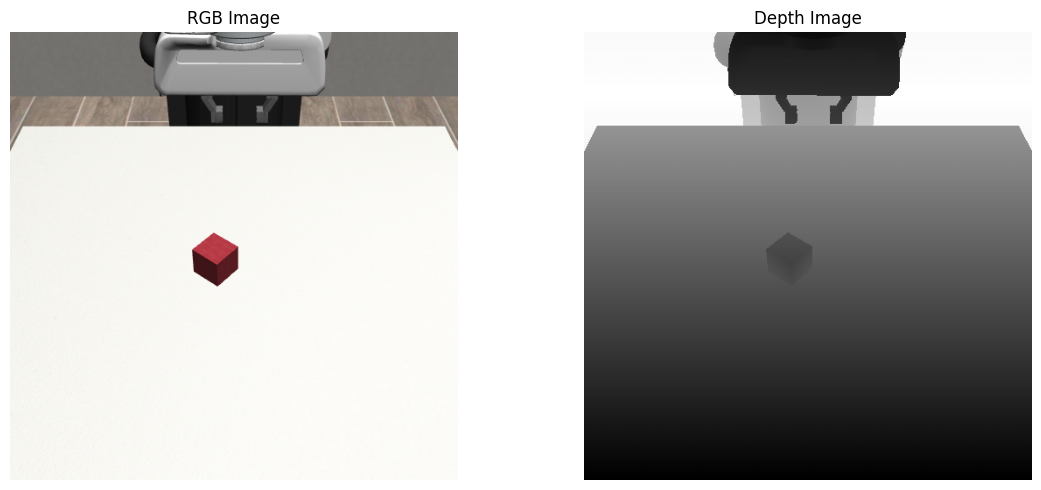

In [52]:
# Visualize RGB and depth images
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(rgb_image)
axes[0].set_title('RGB Image')
axes[0].axis('off')

axes[1].imshow(depth.squeeze(), cmap='gray')
axes[1].set_title('Depth Image')
axes[1].axis('off')
plt.tight_layout()
plt.show()

In [55]:
# Print statistics
print(f"XYZ range: [{xyz.min(axis=0)}, {xyz.max(axis=0)}]")
print(f"RGB range: [{rgb.min(axis=0)}, {rgb.max(axis=0)}]")
print(f"\nCentered XYZ (inputs[:,:3]) range: [{inputs[:,:3].min(axis=0)}, {inputs[:,:3].max(axis=0)}]")
print(f"Normalized RGB (inputs[:,3:]) range: [{inputs[:,3:].min(axis=0)}, {inputs[:,3:].max(axis=0)}]")

XYZ range: [[-0.39995705 -0.24499346  0.55038798], [0.3993724  0.22708763 1.02307725]]
RGB range: [[0.07843137 0.07058824 0.07843137], [1. 1. 1.]]

Centered XYZ (inputs[:,:3]) range: [[-0.39859989 -0.27709211 -0.18119263], [0.39867495 0.19498897 0.29149664]]
Normalized RGB (inputs[:,3:]) range: [[0.07843137 0.0745098  0.07843137], [1. 1. 1.]]


In [56]:
# Visualize point cloud with Open3D
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
pcd.colors = o3d.utility.Vector3dVector(rgb)

# Add coordinate frame
coord_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0, 0, 0])

o3d.visualization.draw_geometries([pcd, coord_frame],
                                  window_name='Point Cloud',
                                  width=1024,
                                  height=768)

In [ ]:
# Visualize downsampled point cloud (what M2T2 sees)
pcd_sampled = o3d.geometry.PointCloud()
pcd_sampled.points = o3d.utility.Vector3dVector(points)
# Denormalize RGB for visualization
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
rgb_denorm = inputs[:,3:] * std + mean
rgb_denorm = np.clip(rgb_denorm, 0, 1)
pcd_sampled.colors = o3d.utility.Vector3dVector(rgb_denorm)

# Add coordinate frame
coord_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0, 0, 0])

o3d.visualization.draw_geometries([pcd_sampled, coord_frame],
                                  window_name='Downsampled Point Cloud (M2T2 Input)',
                                  width=1024,
                                  height=768)